In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# import libraries
import pandas as pd
df = pd.read_csv("/content/drive/My Drive/Project Taxi Analysis (COVID)/Output_Clean_Features_File.csv")
df

,properties.timestamp,properties.taxi_count,day_of_week,month,year,day_of_month,weekday_weekend
0,2018-01-01 00:00:44+08:00,3305,0,1,2018,1,weekday
1,2018-01-01 01:00:47+08:00,2387,0,1,2018,1,weekday
2,2018-01-01 02:00:50+08:00,2913,0,1,2018,1,weekday
3,2018-01-01 03:00:53+08:00,2909,0,1,2018,1,weekday
4,2018-01-01 04:00:56+08:00,3045,0,1,2018,1,weekday
...,...,...,...,...,...,...,...
20382,2020-06-29 20:00:02+08:00,4790,0,6,2020,29,weekday
20383,2020-06-29 21:00:35+08:00,4716,0,6,2020,29,weekday
20384,2020-06-29 22:00:38+08:00,4301,0,6,2020,29,weekday
20385,2020-06-29 23:00:41+08:00,3600,0,6,2020,29,weekday


In [ ]:
# Set index of df 
df['properties.timestamp']= pd.to_datetime(df['properties.timestamp']) 
df = df.set_index('properties.timestamp')

In [ ]:
# turn your categorical data into binary form, drop one column
df1=pd.get_dummies(df)

In [ ]:
df1

,properties.taxi_count,day_of_week,month,year,day_of_month,weekday_weekend_weekday,weekday_weekend_weekend
properties.timestamp,,,,,,,
2018-01-01 00:00:44+08:00,3305,0,1,2018,1,1,0
2018-01-01 01:00:47+08:00,2387,0,1,2018,1,1,0
2018-01-01 02:00:50+08:00,2913,0,1,2018,1,1,0
2018-01-01 03:00:53+08:00,2909,0,1,2018,1,1,0
2018-01-01 04:00:56+08:00,3045,0,1,2018,1,1,0
...,...,...,...,...,...,...,...
2020-06-29 20:00:02+08:00,4790,0,6,2020,29,1,0
2020-06-29 21:00:35+08:00,4716,0,6,2020,29,1,0
2020-06-29 22:00:38+08:00,4301,0,6,2020,29,1,0


In [ ]:
df1=df1.drop(['weekday_weekend_weekday'],axis=1)
df1.rename(columns = {'weekday_weekend_weekend':'Weekend'}, inplace = True) 
df1

,properties.taxi_count,day_of_week,month,year,day_of_month,Weekend
properties.timestamp,,,,,,
2018-01-01 00:00:44+08:00,3305,0,1,2018,1,0
2018-01-01 01:00:47+08:00,2387,0,1,2018,1,0
2018-01-01 02:00:50+08:00,2913,0,1,2018,1,0
2018-01-01 03:00:53+08:00,2909,0,1,2018,1,0
2018-01-01 04:00:56+08:00,3045,0,1,2018,1,0
...,...,...,...,...,...,...
2020-06-29 20:00:02+08:00,4790,0,6,2020,29,0
2020-06-29 21:00:35+08:00,4716,0,6,2020,29,0
2020-06-29 22:00:38+08:00,4301,0,6,2020,29,0


In [ ]:
# resample at day level use median
df1=df1.resample('D').median()
df1

,properties.taxi_count,day_of_week,month,year,day_of_month,Weekend
properties.timestamp,,,,,,
2018-01-01 00:00:00+08:00,3304.5,0.0,1.0,2018.0,1.0,0.0
2018-01-02 00:00:00+08:00,4501.5,1.0,1.0,2018.0,2.0,0.0
2018-01-03 00:00:00+08:00,4950.5,2.0,1.0,2018.0,3.0,0.0
2018-01-04 00:00:00+08:00,4721.5,3.0,1.0,2018.0,4.0,0.0
2018-01-05 00:00:00+08:00,3907.0,4.0,1.0,2018.0,5.0,0.0
...,...,...,...,...,...,...
2020-06-26 00:00:00+08:00,3661.0,4.0,6.0,2020.0,26.0,0.0
2020-06-27 00:00:00+08:00,3368.5,5.0,6.0,2020.0,27.0,1.0
2020-06-28 00:00:00+08:00,2754.0,6.0,6.0,2020.0,28.0,1.0


In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split
df1.columns

Index(['properties.taxi_count', 'day_of_week', 'month', 'year', 'day_of_month',
       'Weekend'],
      dtype='object')

In [ ]:
#drop NAN values and select features for X and y

df1=df1.dropna()
X=df1[['day_of_week', 'month', 'year', 'day_of_month','Weekend']]
# y as vector, not as Series
y=df1['properties.taxi_count']
y

properties.timestamp
2018-01-01 00:00:00+08:00    3304.5
2018-01-02 00:00:00+08:00    4501.5
2018-01-03 00:00:00+08:00    4950.5
2018-01-04 00:00:00+08:00    4721.5
2018-01-05 00:00:00+08:00    3907.0
                              ...  
2020-06-26 00:00:00+08:00    3661.0
2020-06-27 00:00:00+08:00    3368.5
2020-06-28 00:00:00+08:00    2754.0
2020-06-29 00:00:00+08:00    4082.0
2020-06-30 00:00:00+08:00    3438.0
Name: properties.taxi_count, Length: 866, dtype: float64

In [ ]:
# split your data into 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state= 123)

In [ ]:
y_test

properties.timestamp
2018-08-16 00:00:00+08:00    4858.0
2019-08-21 00:00:00+08:00    4227.0
2018-10-08 00:00:00+08:00    4449.0
2018-02-22 00:00:00+08:00    4142.0
2018-06-12 00:00:00+08:00    3270.5
                              ...  
2018-11-26 00:00:00+08:00    4792.0
2020-04-05 00:00:00+08:00    3913.5
2018-04-13 00:00:00+08:00    3904.0
2019-06-09 00:00:00+08:00    3490.5
2018-09-19 00:00:00+08:00    4477.0
Name: properties.taxi_count, Length: 174, dtype: float64

In [ ]:
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#dummy regressor for baseline
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train, y_train)
DummyRegressor()
dummy_pred=dummy_regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, dummy_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, dummy_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, dummy_pred)))

Mean Absolute Error: 616.0355790312937
Mean Squared Error: 602688.7656131005
Root Mean Squared Error: 776.3303199109903


In [ ]:
#linear regressor 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
linear_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, linear_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, linear_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, linear_pred)))

Mean Absolute Error: 573.5064674620158
Mean Squared Error: 518636.7919489709
Root Mean Squared Error: 720.1644200798668


In [ ]:
#decision tree regressor 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train, y_train)
decision_tree_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, decision_tree_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, decision_tree_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, decision_tree_pred)))

Mean Absolute Error: 453.4568965517241
Mean Squared Error: 474482.9468390805
Root Mean Squared Error: 688.8272256807802


In [ ]:
#randomforest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train, y_train)
random_tree_pred = regr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, random_tree_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, random_tree_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, random_tree_pred)))

Mean Absolute Error: 310.7203448275862
Mean Squared Error: 183532.1211617816
Root Mean Squared Error: 428.4064905691575


In [ ]:
X_train.columns, regr.feature_importances_

(Index(['day_of_week', 'month', 'year', 'day_of_month', 'Weekend'], dtype='object'),
 array([0.1549034 , 0.37505153, 0.22687414, 0.19697228, 0.04619865]))

In [ ]:
#gradient boost regressor
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=0)
gbm.fit(X_train, y_train)
gbm_pred = gbm.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, gbm_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, gbm_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, gbm_pred)))

Mean Absolute Error: 319.04401031733954
Mean Squared Error: 191833.00769843272
Root Mean Squared Error: 437.98745153078613


In [ ]:
#KNN regressor
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)
KNN_pred = gbm.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, KNN_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, KNN_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, KNN_pred)))


Mean Absolute Error: 319.04401031733954
Mean Squared Error: 191833.00769843272
Root Mean Squared Error: 437.98745153078613


In [ ]:
#extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
etg = ExtraTreesRegressor(random_state=0)
etg.fit(X_train, y_train)
etg_pred = gbm.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, etg_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, etg_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, etg_pred)))

Mean Absolute Error: 319.04401031733954
Mean Squared Error: 191833.00769843272
Root Mean Squared Error: 437.98745153078613


In [ ]:
#ada boost regressor
from sklearn.ensemble import AdaBoostRegressor
abg = AdaBoostRegressor(random_state=0)
abg.fit(X_train, y_train)
abg_pred = gbm.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, abg_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, abg_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, abg_pred)))

Mean Absolute Error: 319.04401031733954
Mean Squared Error: 191833.00769843272
Root Mean Squared Error: 437.98745153078613


In [ ]:
df_final=pd.DataFrame({'Actual': y_test, 'Predicted': dummy_pred})

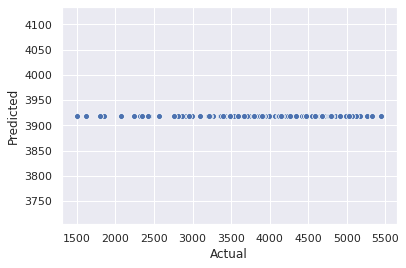

In [ ]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="Actual", y="Predicted", data=df_final)

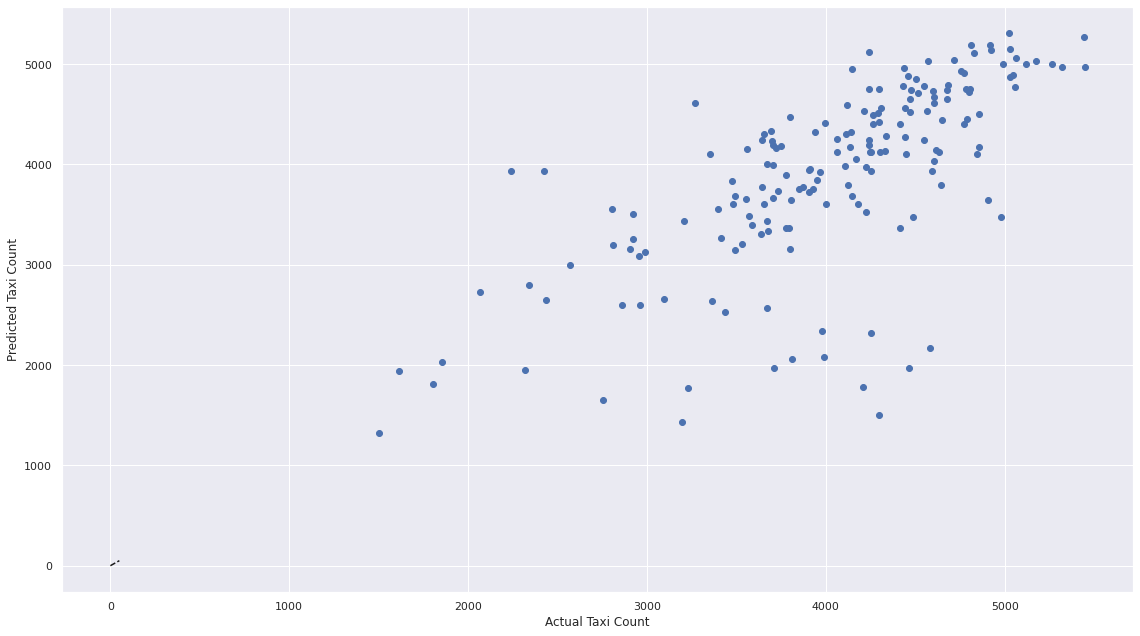

In [ ]:
#decision tree regressor plot
decision_tree_pred
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 9))
plt.scatter(y_test, decision_tree_pred)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('Actual Taxi Count')
plt.ylabel('Predicted Taxi Count')
plt.tight_layout()

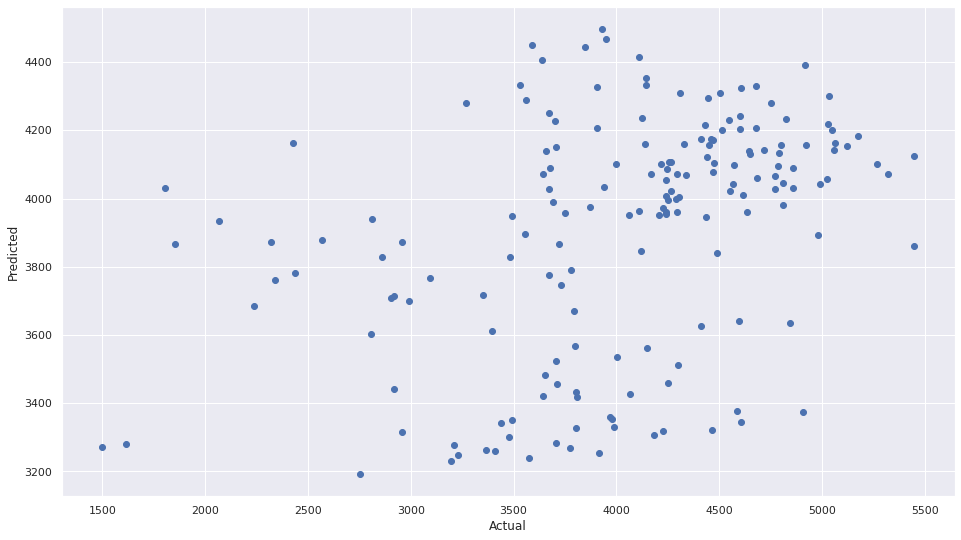

In [ ]:
# plot linear regressor
plt.figure(figsize=(16,9))
ax = plt.axes()
ax.scatter(y_test, linear_pred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.axis('tight')
plt.show()

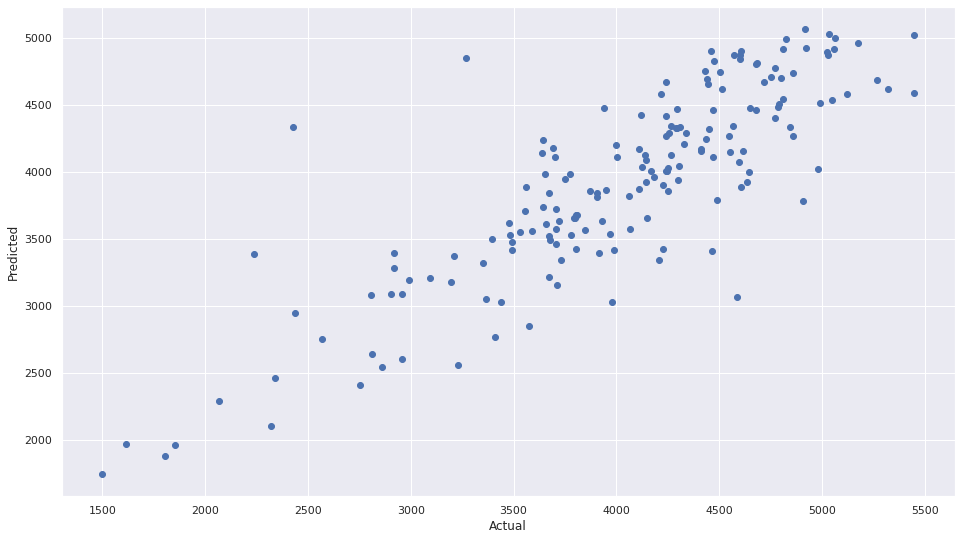

In [ ]:
# plot random forest
plt.figure(figsize=(16, 9))
ax = plt.axes()
ax.scatter(y_test, random_tree_pred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.axis('tight')
plt.show()

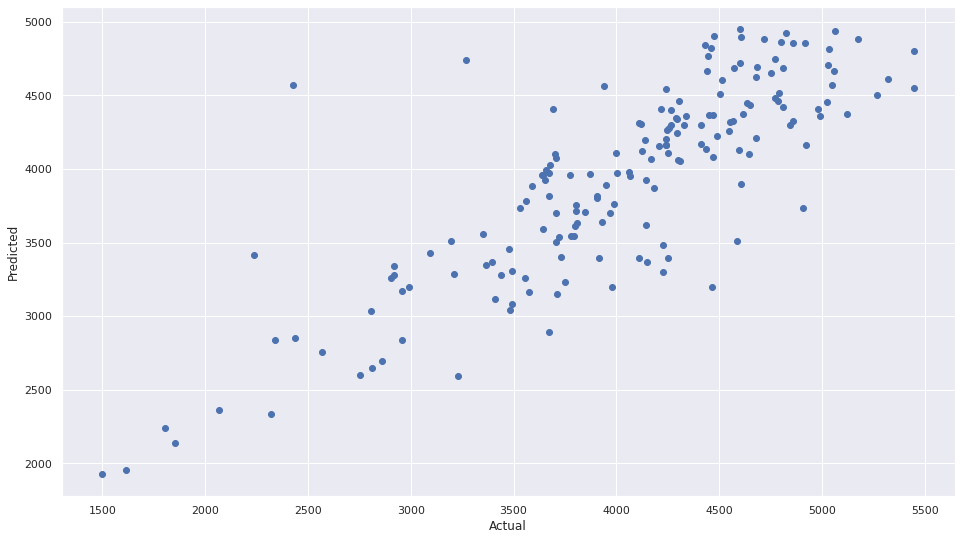

In [ ]:
# plot gradient boost regressor
plt.figure(figsize=(16, 9))
ax = plt.axes()
ax.scatter(y_test, gbm_pred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.axis('tight')
plt.show()

In [ ]:
# Splitting based on time series for prediction (80 and 20)

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size= 0.2, random_state= 123)

In [ ]:
train_sample=round(0.8*len(X))

In [ ]:
X_copy = X.copy()
X_copy = X_copy.drop('Weekend', axis = 1)
X_copy

,day_of_week,month,year,day_of_month
properties.timestamp,,,,
2018-01-01 00:00:00+08:00,0.0,1.0,2018.0,1.0
2018-01-02 00:00:00+08:00,1.0,1.0,2018.0,2.0
2018-01-03 00:00:00+08:00,2.0,1.0,2018.0,3.0
2018-01-04 00:00:00+08:00,3.0,1.0,2018.0,4.0
2018-01-05 00:00:00+08:00,4.0,1.0,2018.0,5.0
...,...,...,...,...
2020-06-26 00:00:00+08:00,4.0,6.0,2020.0,26.0
2020-06-27 00:00:00+08:00,5.0,6.0,2020.0,27.0
2020-06-28 00:00:00+08:00,6.0,6.0,2020.0,28.0


In [ ]:
X_train_new=X_copy[:train_sample+1]
y_train_new=y[:train_sample+1]

In [ ]:
X_train_new

,day_of_week,month,year,day_of_month
properties.timestamp,,,,
2018-01-01 00:00:00+08:00,0.0,1.0,2018.0,1.0
2018-01-02 00:00:00+08:00,1.0,1.0,2018.0,2.0
2018-01-03 00:00:00+08:00,2.0,1.0,2018.0,3.0
2018-01-04 00:00:00+08:00,3.0,1.0,2018.0,4.0
2018-01-05 00:00:00+08:00,4.0,1.0,2018.0,5.0
...,...,...,...,...
2020-01-06 00:00:00+08:00,0.0,1.0,2020.0,6.0
2020-01-07 00:00:00+08:00,1.0,1.0,2020.0,7.0
2020-01-08 00:00:00+08:00,2.0,1.0,2020.0,8.0


In [ ]:
X_test_new=X_copy[train_sample+1:]
y_test_new=y[train_sample+1:]

In [ ]:
X_test_new

,day_of_week,month,year,day_of_month
properties.timestamp,,,,
2020-01-11 00:00:00+08:00,5.0,1.0,2020.0,11.0
2020-01-12 00:00:00+08:00,6.0,1.0,2020.0,12.0
2020-01-13 00:00:00+08:00,0.0,1.0,2020.0,13.0
2020-01-14 00:00:00+08:00,1.0,1.0,2020.0,14.0
2020-01-15 00:00:00+08:00,2.0,1.0,2020.0,15.0
...,...,...,...,...
2020-06-26 00:00:00+08:00,4.0,6.0,2020.0,26.0
2020-06-27 00:00:00+08:00,5.0,6.0,2020.0,27.0
2020-06-28 00:00:00+08:00,6.0,6.0,2020.0,28.0


In [ ]:
#verify train test split samples are equal
print("total length of sample is "+str(len(X))+ " total length of both train test split is "+ str(len(X_test_new) + len(X_train_new)))

total length of sample is 866 total length of both train test split is 866


In [ ]:
#dummy regressor for baseline with new train test split
from sklearn.dummy import DummyRegressor
dummy_regr = DummyRegressor(strategy="mean")
dummy_regr.fit(X_train_new, y_train_new)
DummyRegressor()
dummy_pred_new=dummy_regr.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, dummy_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, dummy_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, dummy_pred_new)))

Mean Absolute Error: 698.305182293412
Mean Squared Error: 705412.3833775874
Root Mean Squared Error: 839.8883160144493


In [ ]:
#linear regressor 
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()  
regressor.fit(X_train_new, y_train_new)
linear_pred_new = regressor.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, linear_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, linear_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, linear_pred_new)))

Mean Absolute Error: 1178.638958703736
Mean Squared Error: 1728310.0961068966
Root Mean Squared Error: 1314.6520817717883


In [ ]:
#decision tree regressor 
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=0)
regressor.fit(X_train_new, y_train_new)
decision_tree_pred_new = regressor.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, decision_tree_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, decision_tree_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, decision_tree_pred_new)))

Mean Absolute Error: 630.5639534883721
Mean Squared Error: 676418.0668604651
Root Mean Squared Error: 822.4463914812109


In [ ]:
#randomforest regressor
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(random_state=0)
regr.fit(X_train_new, y_train_new)
random_tree_pred_new = regr.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, random_tree_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, random_tree_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, random_tree_pred_new)))

Mean Absolute Error: 658.0443313953489
Mean Squared Error: 628361.0566498545
Root Mean Squared Error: 792.6922837077793


In [ ]:
pd.DataFrame({'feature': X_train_new.columns, 'importance': regr.feature_importances_})

,feature,importance
0,day_of_week,0.173086
1,month,0.490936
2,year,0.156413
3,day_of_month,0.179565


In [ ]:
#gradient boost regressor
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(random_state=0)
gbm.fit(X_train_new, y_train_new)
gbm_pred_new = gbm.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, gbm_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, gbm_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, gbm_pred_new)))

Mean Absolute Error: 710.4321708113158
Mean Squared Error: 696582.8585976346
Root Mean Squared Error: 834.6153956150309


In [ ]:
#KNN regressor
from sklearn.neighbors import KNeighborsRegressor
KNN = KNeighborsRegressor()
KNN.fit(X_train_new, y_train_new)
KNN_pred_new = gbm.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, KNN_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, KNN_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, KNN_pred_new)))

Mean Absolute Error: 710.4321708113158
Mean Squared Error: 696582.8585976346
Root Mean Squared Error: 834.6153956150309


In [ ]:
#extra tree regressor
from sklearn.ensemble import ExtraTreesRegressor
etg = ExtraTreesRegressor(random_state=0)
etg.fit(X_train_new, y_train_new)
etg_pred_new = gbm.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, etg_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, etg_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, etg_pred_new)))

Mean Absolute Error: 710.4321708113158
Mean Squared Error: 696582.8585976346
Root Mean Squared Error: 834.6153956150309


In [ ]:
#ada boost regressor
from sklearn.ensemble import AdaBoostRegressor
abg = AdaBoostRegressor(random_state=0)
abg.fit(X_train_new, y_train_new)
abg_pred_new = gbm.predict(X_test_new)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_new, abg_pred_new))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test_new, abg_pred_new))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_new, abg_pred_new)))

Mean Absolute Error: 710.4321708113158
Mean Squared Error: 696582.8585976346
Root Mean Squared Error: 834.6153956150309


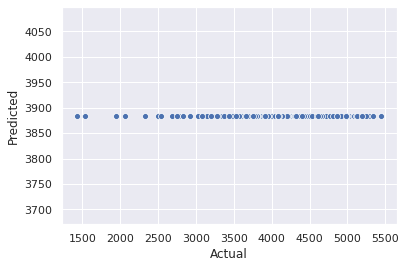

In [ ]:
#dummy regressor scatterplot

df_final = pd.DataFrame({'Actual': y_test_new, 'Predicted': dummy_pred_new})
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
ax = sns.scatterplot(x="Actual", y="Predicted", data=df_final)

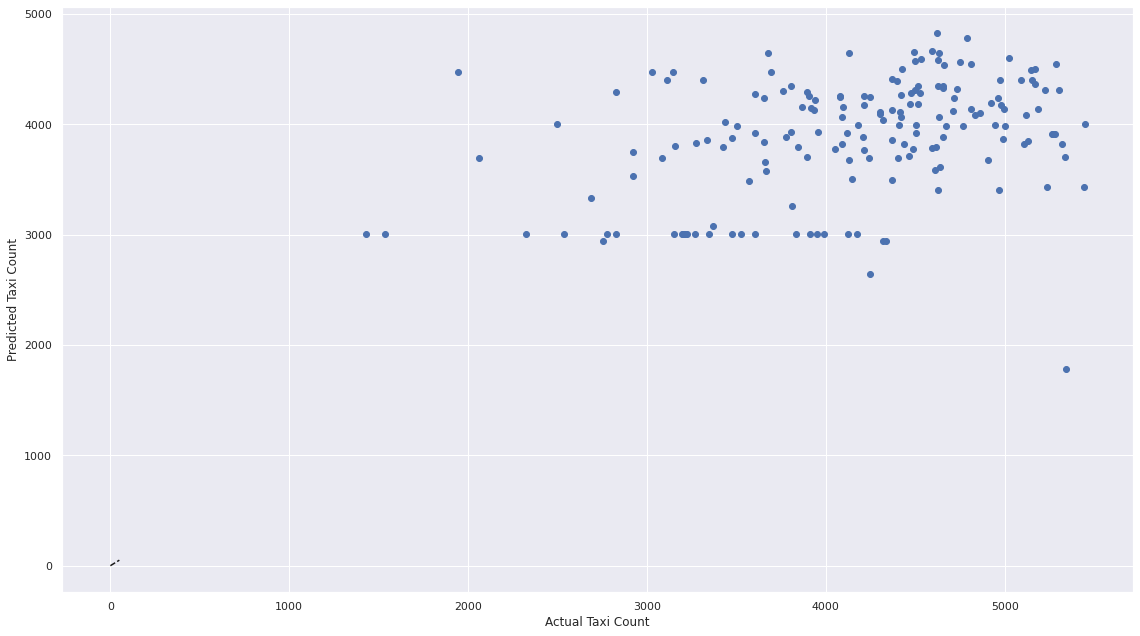

In [ ]:
#decision tree regressor plot
decision_tree_pred
from matplotlib import pyplot as plt
plt.figure(figsize=(16, 9))
plt.scatter(y_test_new, decision_tree_pred_new)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('Actual Taxi Count')
plt.ylabel('Predicted Taxi Count')
plt.tight_layout()

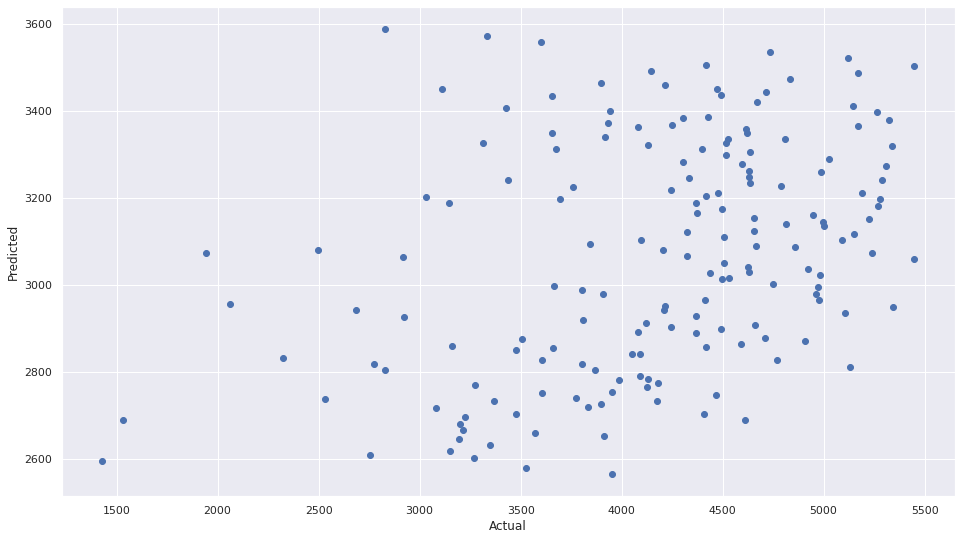

In [ ]:
# plot linear regressor
plt.figure(figsize=(16,9))
ax = plt.axes()
ax.scatter(y_test_new, linear_pred_new)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.axis('tight')
plt.show()

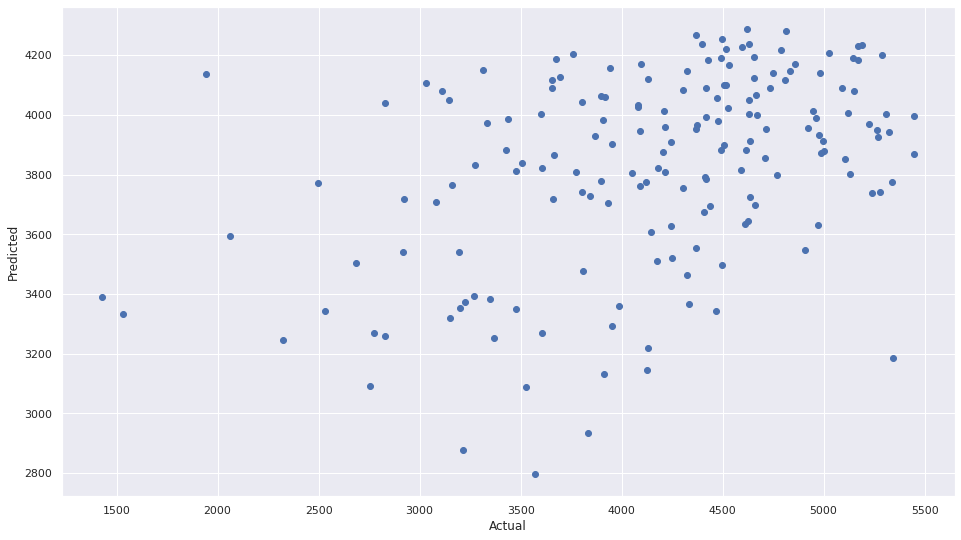

In [ ]:
# plot random forest
plt.figure(figsize=(16, 9))
ax = plt.axes()
ax.scatter(y_test_new, random_tree_pred_new)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.axis('tight')
plt.show()

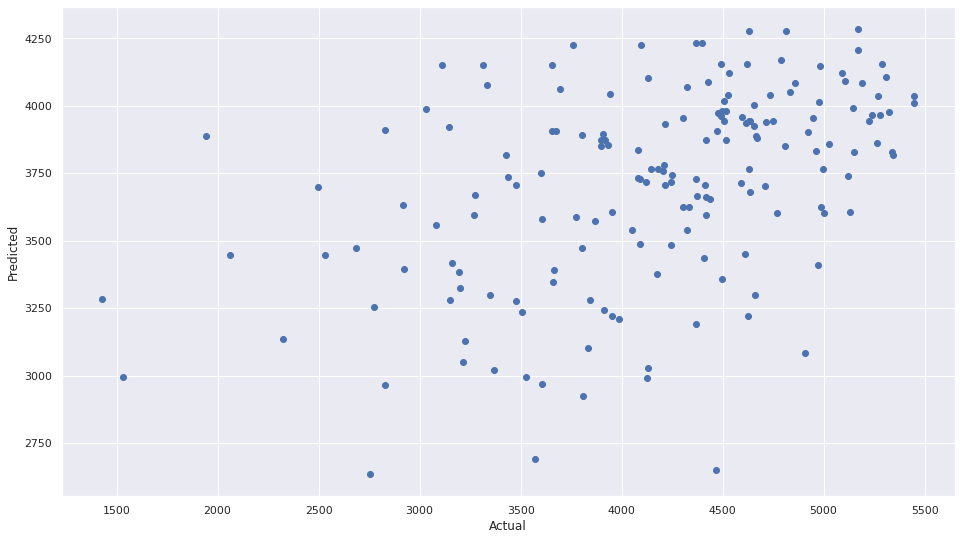

In [ ]:
# plot gradient boost regressor
plt.figure(figsize=(16, 9))
ax = plt.axes()
ax.scatter(y_test_new, gbm_pred_new)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.axis('tight')
plt.show()

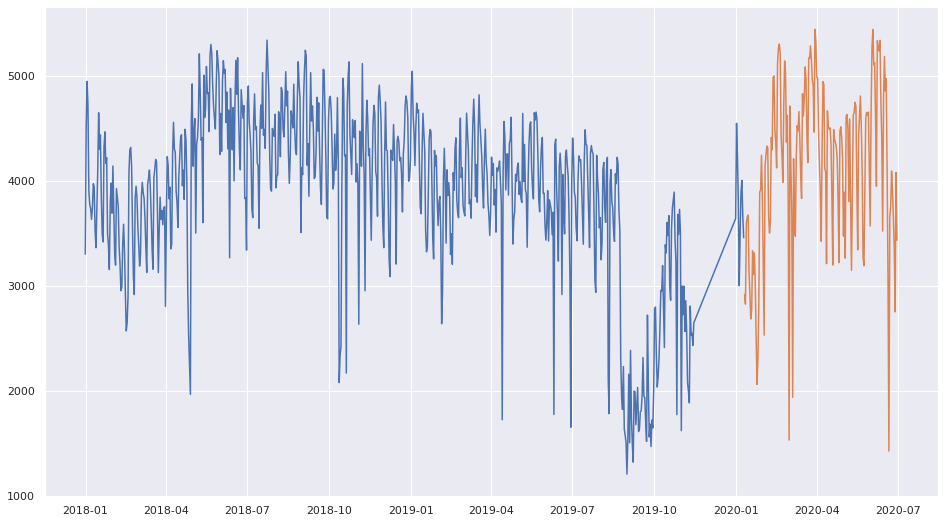

In [ ]:
#plot train and test data for 2nd split
plt.figure(figsize=(16, 9))
ax = plt.axes()
plt.plot(y_train_new)
plt.plot(y_test_new)
plt.show()


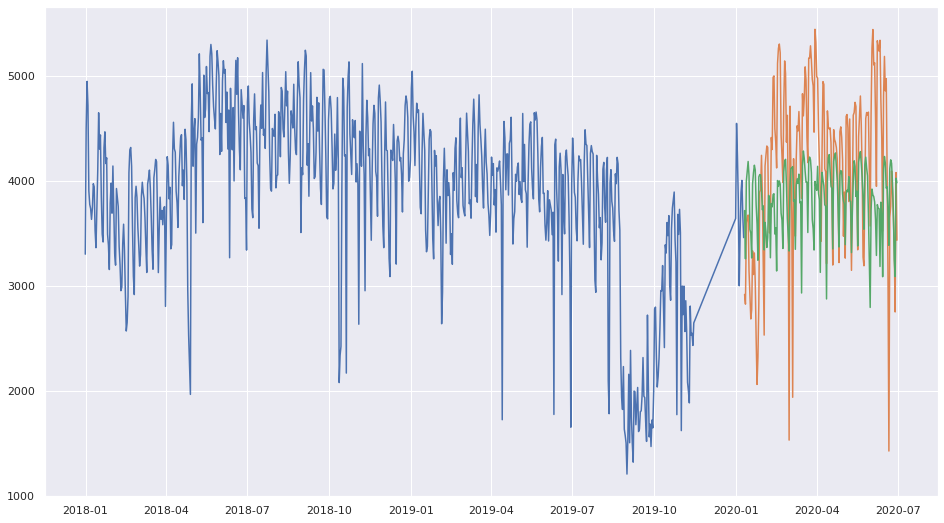

In [ ]:
#for 2nd selection of train split random forest gave good RMSE
# Change the prediction to a dataframe and same index as y_test data
df_random_tree_pred_new = pd.DataFrame(data=random_tree_pred_new, index=y_test_new.index)
# plotting all together
plt.figure(figsize=(16, 9))
ax = plt.axes()
plt.plot(y_train_new)
plt.plot(y_test_new)
plt.plot(df_random_tree_pred_new)
plt.show()